<a href="https://colab.research.google.com/github/myschl/ML-DL/blob/master/RUL_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, cross_validate
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import pandas as pd
from math import sqrt
from tensorflow import keras
import numpy as np # linear algebra
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
from keras.utils import to_categorical
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# %tensorflow_version 1.x

# **Optimization Algorithms**

**Grid Search Optimizer**

In [ ]:
def grid_s_optimazer(alg, feature, labels):

  #scaling the data
  Scaler =StandardScaler()
  features =Scaler.fit_transform(feature)  

  # for XGBRegressor Algorithm
  if(alg == 'XGB'):
    # define model
    model = XGBRegressor()
    # define evaluation
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define search params
    params = dict()
    params['n_estimators'] = [50, 100, 150]
    params['max_depth'] = [3, 5, 10]
    params['learning_rate'] = [0.1, 0.2, 0.01]
    params['gamma'] = [0, 0.1]
    params['booster'] = ['gbtree', 'gblinear']
    # define search
    G_search = GridSearchCV(model, params, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
    # execute search
    result = G_search.fit(features, labels)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

  # for Random forest Algorithm
  if(alg == 'RF'):
    # define model
    model = RandomForestRegressor()
    # define evaluation
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define search params
    params = dict()
    params['n_estimators'] = [2, 5, 10, 50, 100]
    params['max_depth'] = [None, 2, 5, 10, 15, 20]
    params['max_leaf_nodes'] = [None, 2, 5]
    # define search
    G_search = GridSearchCV(model, params, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
    # execute search
    result = G_search.fit(features, labels)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

  # for SVR Algorithm
  if(alg == 'SVR'):
    # define model
    model = SVR()
    # define evaluation
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define search params
    params = dict()
    params['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
    params['gamma'] = ['scale', 'auto']
    params['C'] = [1e-5, 1e-2, 1e-1, 1, 10, 100]
    params['degree'] = [3, 2, 5, 1, 10, 100]
    # define search
    G_search = GridSearchCV(model, params, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
    # execute search
    result = G_search.fit(features, labels)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

  else:
    print("No algorithm found check your algorithm name")


**Random Search Optimizer**

In [ ]:
def random_s_optimazer(alg, features, labels):

  #scaling the data
  Scaler =StandardScaler()
  features =Scaler.fit_transform(feature)

  # for XGBRegressor Algorithm
  if(alg == 'XGB'):
    # define model
    model = XGBRegressor()
    # define evaluation
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define search params
    params = dict()
    params['n_estimators'] = [2, 5, 10, 50, 100]
    params['max_depth'] = [3, 5, 10, 15, 20]
    params['learning_rate'] = [0.1, 0.2, 0.001, 0.01, 0.009]
    params['gamma'] = [0, 0.2, 2, 5, 10]
    params['booster'] = ['gbtree', 'gblinear']
    # define search
    R_search = RandomizedSearchCV(model, params, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)
    # execute search
    result = R_search.fit(features, labels)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

  # for Random forest Algorithm
  if(alg == 'RF'):
    # define model
    model = RandomForestRegressor()
    # define evaluation
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define search params
    params = dict()
    params['n_estimators'] = [2, 5, 10, 50, 100]
    params['max_depth'] = [None, 2, 5, 10, 15, 20]
    params['max_leaf_nodes'] = [None, 2, 5]
    # define search
    R_search = RandomizedSearchCV(model, params, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)
    # execute search
    result = R_search.fit(features, labels)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

  # for SVR Algorithm
  if(alg == 'SVR'):
    # define model
    model = SVR()
    # define evaluation
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define search params
    params = dict()
    params['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
    params['gamma'] = ['scale', 'auto']
    params['C'] = [1e-5, 1e-2, 1e-1, 1, 10, 100]
    params['degree'] = [3, 2, 5, 1, 10, 100]
    # define search
    R_search = RandomizedSearchCV(model, params, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)
    # execute search
    result = R_search.fit(features, labels)
    # summarize result
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

  else:
    print("No algorithm found check your algorithm name")


**Genetic Algorithm Optimizer**

In [ ]:
!pip install pygad

Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
Generation = 1
Fitness    = 1.119587447253204
Change     = 1.119587447253204
Generation = 2
Fitness    = 1.1548819149075555
Change     = 0.035294467654351624
Generation = 3
Fitness    = 1.3701996950673165
Change     = 0.215317780159761
Generation = 4
Fitness    = 1.3701996950673165
Change     = 0.0
Generation = 5
Fitness    = 1.5196302027015216
Change     = 0.14943050763420507
Generation = 6
Fitness    = 1.5196302027015216
Change     = 0.0
Generation = 7
Fitness    = 1.5196302027015216
Change     = 0.0
Generation = 8
Fitness    = 1.5196302027015216
Change     = 0.0
Generation = 9
Fitness    = 1.5481777412233488
Change     = 0.02854753852182723
Generation = 10
Fitness    = 1.5481777412233488
Change     = 0.0
Generation = 11
Fitness    = 1.5481777412233488
Change     = 0.0
Generation = 12
Fitness    = 1.548177741223348

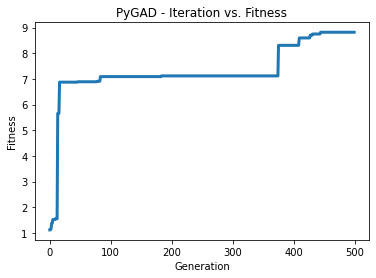

Parameters of the best solution : [ 1.39902017e+00  1.05092443e+00 -1.08021380e+00 -1.22936310e-01
 -4.78722770e+00  5.49559240e-02 -6.23762036e+00 -2.90480985e-03
  1.64332152e+00  3.76157388e+00  1.01900920e-01  1.53170409e-01]
Fitness value of the best solution = 8.81939857829748
Index of the best solution : 0
Best fitness value reached after 444 generations.
Predictions of the trained network : [array([0.11378591, 0.07569928]), array([1.83871759, 1.22325855])]
Absolute error : 0.11338641644576206.


In [ ]:
import numpy
import pygad
import pygad.nn
import pygad.gann

def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs

    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs, problem_type="regression")
    solution_fitness = 1.0/numpy.mean(numpy.abs(predictions - data_outputs))
    # solution_fitness = sqrt(mean_squared_error(data_outputs, predictions))
    # solution_fitness = mean_absolute_error(data_outputs, predictions)

    return solution_fitness

def callback_generation(ga_instance):
    global GANN_instance, last_fitness

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks, 
                                                            population_vectors=ga_instance.population)

    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)

    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))

    last_fitness = ga_instance.best_solution()[1].copy()

# Holds the fitness value of the previous generation.
last_fitness = 0

# Preparing the NumPy array of the inputs.
data_inputs = numpy.array([[2, 5, -3, 0.1],
                           [8, 15, 20, 13]])

# Preparing the NumPy array of the outputs.
data_outputs = numpy.array([[0.1, 0.2],
                            [1.8, 1.5]])

# The length of the input vector for each sample (i.e. number of neurons in the input layer).
num_inputs = data_inputs.shape[1]

# Creating an initial population of neural networks. The return of the initial_population() function holds references to the networks, not their weights. Using such references, the weights of all networks can be fetched.
num_solutions = 6 # A solution or a network can be used interchangeably.
GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,
                                num_neurons_input=num_inputs,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="None")

# population does not hold the numerical weights of the network instead it holds a list of references to each last layer of each network (i.e. solution) in the population. A solution or a network can be used interchangeably.
# If there is a population with 3 solutions (i.e. networks), then the population is a list with 3 elements. Each element is a reference to the last layer of each network. Using such a reference, all details of the network can be accessed.
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
initial_population = population_vectors.copy()

num_parents_mating = 4 # Number of solutions to be selected as parents in the mating pool.

num_generations = 500 # Number of generations.

mutation_percent_genes = 5 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists.

parent_selection_type = "sss" # Type of parent selection.

crossover_type = "single_point" # Type of the crossover operator.

mutation_type = "random" # Type of the mutation operator.

keep_parents = 1 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

init_range_low = -1
init_range_high = 1

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       mutation_percent_genes=mutation_percent_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       callback_generation=callback_generation)

ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Predicting the outputs of the data using the best solution.
predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=data_inputs,
                               problem_type="regression")
print("Predictions of the trained network : {predictions}".format(predictions=predictions))

# Calculating some statistics
abs_error = numpy.mean(numpy.abs(predictions - data_outputs))
print("Absolute error : {abs_error}.".format(abs_error=abs_error))

# **Data Preprocessing**

**Loading the data**

In [3]:
# unzipping my data folder from my google drive
from zipfile import ZipFile
file_name = '/content/drive/My Drive/SS_Thesis/CMAPSSData_12NOV2020.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")


Done


In [4]:
# the files did not contain headers. Here we create labels based on documentation
target_var = ['Target_Remaining_Useful_Life']
index_columns_names =  ["UnitNumber","Cycle"]
op_settings_columns = ["Op_Setting_"+str(i) for i in range(1,4)]
sensor_columns =["Sensor_"+str(i) for i in range(1,22)]
column_names = index_columns_names + op_settings_columns + sensor_columns
print(column_names)

['UnitNumber', 'Cycle', 'Op_Setting_1', 'Op_Setting_2', 'Op_Setting_3', 'Sensor_1', 'Sensor_2', 'Sensor_3', 'Sensor_4', 'Sensor_5', 'Sensor_6', 'Sensor_7', 'Sensor_8', 'Sensor_9', 'Sensor_10', 'Sensor_11', 'Sensor_12', 'Sensor_13', 'Sensor_14', 'Sensor_15', 'Sensor_16', 'Sensor_17', 'Sensor_18', 'Sensor_19', 'Sensor_20', 'Sensor_21']


In [5]:
# load data
train= pd.read_csv('/content/CMAPSSData_03March_2020/train_FD001.txt', sep=" ", header=None)
test = pd.read_csv('/content/CMAPSSData_03March_2020/test_FD001.txt', sep=" ", header=None)
print("train shape: ", train.shape, "test shape: ", test.shape)
# drop pesky NULL columns
train.drop(train.columns[[26, 27]], axis=1, inplace=True)
test.drop(test.columns[[26, 27]], axis=1, inplace=True)
# name columns
train.columns = [column_names]
test.columns = [column_names]
train.head()
train.columns = column_names
test.columns = column_names
train[train['UnitNumber'] == 1].head(5)
test[test['UnitNumber'] == 1].head(5)
train

train shape:  (20631, 28) test shape:  (13096, 28)


,UnitNumber,Cycle,Op_Setting_1,Op_Setting_2,Op_Setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [18]:
# this section calculates Remaining Useful Life (RUL) in T-minus notation for the training data
# find the last cycle per unit number
max_cycle = train.groupby('UnitNumber')['Cycle'].max().reset_index()
max_cycle.columns = ['UnitNumber', 'MaxOfCycle']
# merge the max cycle back into the original frame
train_merged = train.merge(max_cycle, left_on='UnitNumber', right_on='UnitNumber', how='inner')
# calculate RUL for each row
Target_Remaining_Useful_Life = train_merged["MaxOfCycle"] - train_merged["Cycle"]
train_with_target = train_merged["Target_Remaining_Useful_Life"] = Target_Remaining_Useful_Life
# remove unnecessary column
train_with_target = train_merged.drop("MaxOfCycle", axis=1)
train_with_target[train_with_target['UnitNumber'] == 1]

,UnitNumber,Cycle,Op_Setting_1,Op_Setting_2,Op_Setting_3,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Sensor_21,Target_Remaining_Useful_Life
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,21.61,551.94,2388.31,9037.91,1.3,48.00,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588,4
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,21.61,550.70,2388.27,9044.55,1.3,48.08,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127,3
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,21.61,551.29,2388.29,9040.58,1.3,48.33,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,2
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,21.61,550.92,2388.28,9042.76,1.3,48.15,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,1


# **Visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


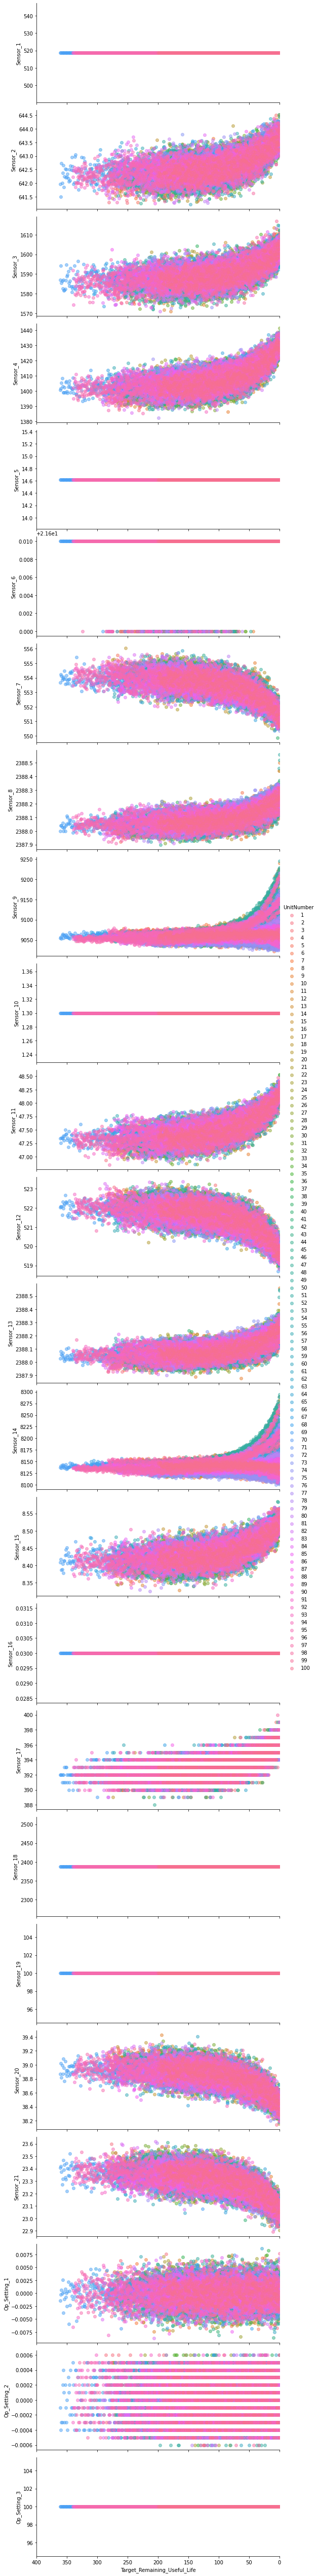

In [ ]:
# use seaborn to visualize features to target (RUL)
explore = sns.PairGrid(data=train_with_target.query('UnitNumber <= 100') ,
                 x_vars=target_var,
                 y_vars=sensor_columns + op_settings_columns,
                 hue="UnitNumber", size=3, aspect=2.5)
explore = explore.map(plt.scatter, alpha=0.5)
explore = explore.set(xlim=(400,0))
explore = explore.add_legend()

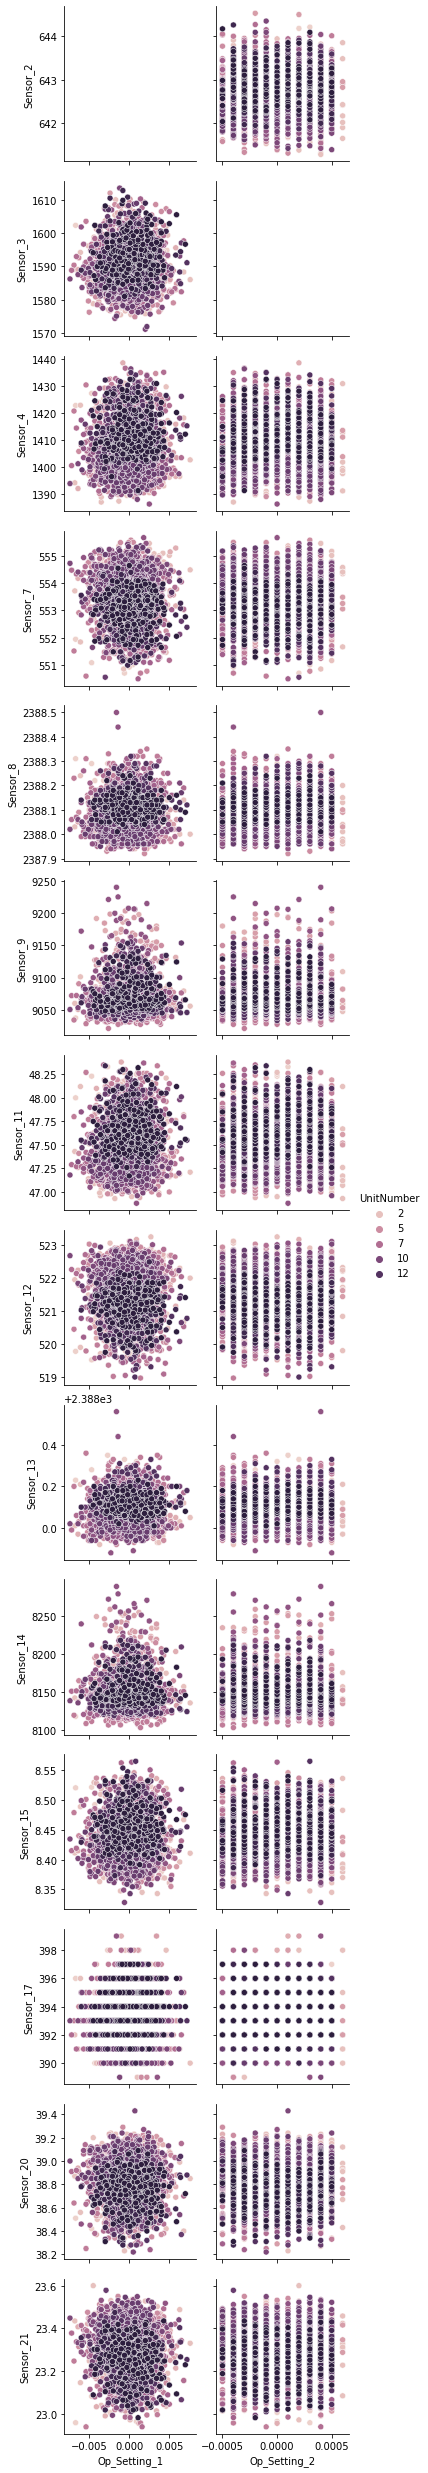

In [ ]:
# operational setting 3 is stable, let's visualize op setting 1 and 2 against some of the most active sensors
g = sns.pairplot(data=train_with_target.query('UnitNumber < 15'),
                 x_vars=["Op_Setting_1","Op_Setting_2"],
                 y_vars=["Sensor_2", "Sensor_3", "Sensor_4", "Sensor_7", "Sensor_8", "Sensor_9", "Sensor_11", "Sensor_12", "Sensor_13", "Sensor_14", "Sensor_15", "Sensor_17", "Sensor_20", "Sensor_21"],
                 hue="UnitNumber", aspect=1)

# **Feature Importance/Selection**

In [19]:
# now it's time to clear out target leakage
print(train_with_target.shape)
leakage_to_drop = ['UnitNumber', 'Cycle', 'Op_Setting_1', 'Op_Setting_2', 'Op_Setting_3']  
train_no_leakage = train_with_target.drop(leakage_to_drop, axis = 1)
print(train_no_leakage.shape)
# set up features and target variable 
y = train_no_leakage['Target_Remaining_Useful_Life']
X = train_no_leakage.drop(['Target_Remaining_Useful_Life'], axis = 1)

(20631, 27)
(20631, 22)


In [ ]:
X.isnull().any()

0

In [15]:
Scaler =StandardScaler()
features =Scaler.fit_transform(X)

# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# Conduct PCA
features = pca.fit_transform(features)
# Show results
print("Original number of features:", X.shape[1])
print("Reduced number of features:", features.shape[1])

Original number of features: 13
Reduced number of features: 12


In [20]:
# I like to use a simple random forest to determine some of the most important/meaningful features. Can be used as feature selection
# create an exhuastive random forest (200 trees up to 15 levels deep)
from sklearn import ensemble
rf = ensemble.RandomForestRegressor()
single_rf = ensemble.RandomForestRegressor(n_estimators = 200, max_depth = 15)
single_rf.fit(X, y)
y_pred = single_rf.predict(X)
print("complete")

complete


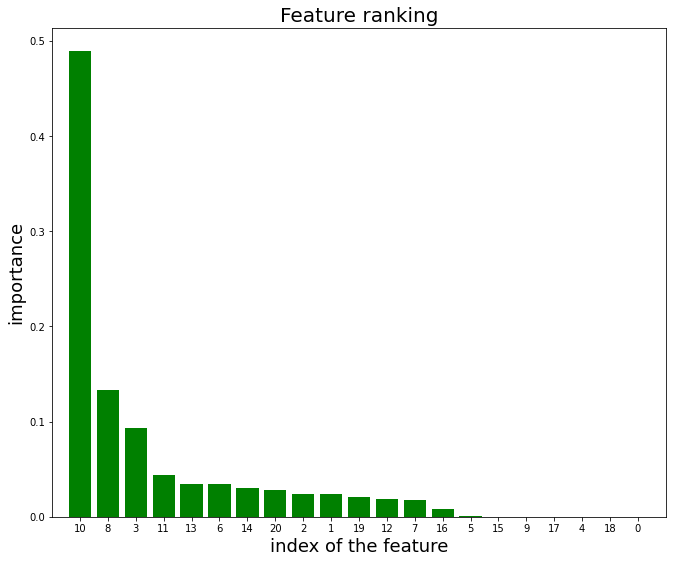

Sensor_11    0.489320
Sensor_9     0.133404
Sensor_4     0.093517
Sensor_12    0.043587
Sensor_14    0.034676
Sensor_7     0.034433
Sensor_15    0.030268
Sensor_21    0.027806
Sensor_3     0.024424
Sensor_2     0.023607
Sensor_20    0.020454
Sensor_13    0.018607
Sensor_8     0.017643
Sensor_17    0.007738
Sensor_6     0.000518
Sensor_16    0.000000
Sensor_10    0.000000
Sensor_18    0.000000
Sensor_5     0.000000
Sensor_19    0.000000
Sensor_1     0.000000
dtype: float64


In [21]:
# graph feature importance
import matplotlib.pyplot as plt
importances = single_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns    
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices], color="g", align="center")
plt.xticks(range(X.shape[1]), indices) #feature_names, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()
# list feature importance
important_features = pd.Series(data=single_rf.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

In [ ]:
X.head()

,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_11,Sensor_12,Sensor_15,Target_Remaining_Useful_Life
0,641.82,1589.70,1400.60,554.36,47.47,521.66,8.4195,191
1,642.15,1591.82,1403.14,553.75,47.49,522.28,8.4318,190
2,642.35,1587.99,1404.20,554.26,47.27,522.42,8.4178,189
3,642.35,1582.79,1401.87,554.45,47.13,522.86,8.3682,188
4,642.37,1582.85,1406.22,554.00,47.28,522.19,8.4294,187


In [8]:
# based on the graphs as well as random forest feature importance, I will exclude sensors without much valuable information
print(train_no_leakage.shape)
vars_to_drop = ["Sensor_"+str(i) for i in [1, 3, 5, 6,  10, 16, 18, 19]]      #using 14 sensors
# vars_to_drop = ["Sensor_"+str(i) for i in [1,5, 6, 8, 9,  10, 13, 14, 16, 17, 18, 19, 20, 21]]      #using 7 sensors
# vars_to_drop = ["Sensor_"+str(i) for i in [1, 2, 3, 4, 5, 6, 8, 9,  10, 11, 13, 14, 16, 17, 18, 19, 20, 21]]     #using 3 sensors 
train_final = train_no_leakage.drop(vars_to_drop, axis = 1)
print(train_final.shape)
X = train_final

(20631, 22)
(20631, 14)


In [ ]:
train_final.head()

,Sensor_2,Sensor_4,Sensor_7,Sensor_8,Sensor_9,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_17,Sensor_20,Sensor_21,Target_Remaining_Useful_Life
0,641.82,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,642.15,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,642.35,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,642.35,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,642.37,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


In [9]:
# identify categorical and numeric fields
from sklearn import preprocessing
categorical = train_final.select_dtypes(include=['object'])
numeric = train_final.select_dtypes(exclude=['object'])
print(categorical.columns.values)
# create dummy variables (if any categorical fields)
for name, values in categorical.items():
    print(name)
    dummies = pd.get_dummies(values.str.strip(), prefix = name, dummy_na=True)
    numeric = pd.concat([numeric, dummies], axis=1)
# imputation (if any NULL values)
for name in numeric:
    print(name)
    if pd.isnull(numeric[name]).sum() > 0:
        numeric["%s_mi" % (name)] = pd.isnull(numeric[name])
        median = numeric[name].median()
        numeric[name] = numeric[name].apply(lambda x: median if pd.isnull(x) else x)
y = numeric['Target_Remaining_Useful_Life']
X = numeric.drop(['Target_Remaining_Useful_Life'], axis = 1)

[]
Sensor_2
Sensor_4
Sensor_7
Sensor_8
Sensor_9
Sensor_11
Sensor_12
Sensor_13
Sensor_14
Sensor_15
Sensor_17
Sensor_20
Sensor_21
Target_Remaining_Useful_Life


In [ ]:
X.shape

(20631, 15)

# **Building Models**

In [10]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

#scaling the data
Scaler =StandardScaler()
train_data =Scaler.fit_transform(train_data) 
test_data =Scaler.fit_transform(test_data) 


In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

**XGB**

In [ ]:
grid_s_optimazer('XGB', X, y)

[12:44:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Score: -29.28475203586711
Best Hyperparameters: {'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
No algorithm found check your algorithm name


In [ ]:
model = XGBRegressor(max_depth=5, learning_rate=0.1, gamma=0, booster='gbtree', n_estimators=50)

model.fit(train_data, train_labels)

preds = model.predict(test_data)


print("Random Forest Root Mean Squared Error: ", sqrt(mean_squared_error(test_labels, preds)))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(test_labels, preds))
print("Random Forest r-squared: ", r2_score(test_labels, preds))

[21:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Random Forest Root Mean Squared Error:  42.51209465531424
Random Forest Mean Absolute Error:  29.959249241403498
Random Forest r-squared:  0.6317640971605981


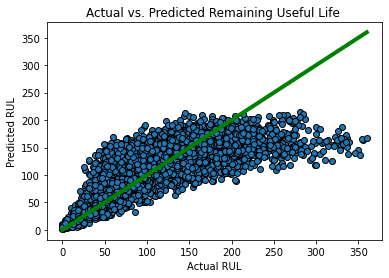

In [ ]:
# plot actual vs predicted Remaining Useful Life for the  model
fig, ax = plt.subplots()
ax.scatter(test_labels, preds, edgecolors=(0, 0, 0))
ax.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'g', lw=4)
ax.set_xlabel('Actual RUL')
ax.set_ylabel('Predicted RUL')
ax.set_title('Actual vs. Predicted Remaining Useful Life ')
plt.show()

In [ ]:
X.shape

(20631, 15)

**RF**

In [ ]:
grid_s_optimazer('RF', X, y)

In [ ]:
model = RandomForestRegressor()

model.fit(train_data, train_labels)

preds = model.predict(test_data)


print("Random Forest Root Mean Squared Error: ", sqrt(mean_squared_error(test_labels, preds)))
print("Random Forest Mean Absolute Error: ", mean_absolute_error(test_labels, preds))
print("Random Forest r-squared: ", r2_score(test_labels, preds))

Random Forest Root Mean Squared Error:  42.89322768142377
Random Forest Mean Absolute Error:  30.256169130118728
Random Forest r-squared:  0.6251318203978956


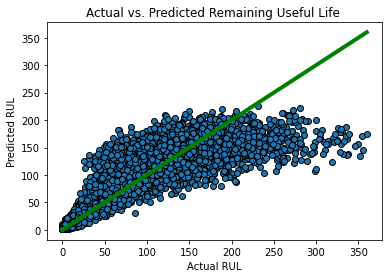

In [ ]:
# plot actual vs predicted Remaining Useful Life for the  model
fig, ax = plt.subplots()
ax.scatter(test_labels, preds, edgecolors=(0, 0, 0))
ax.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'g', lw=4)
ax.set_xlabel('Actual RUL')
ax.set_ylabel('Predicted RUL')
ax.set_title('Actual vs. Predicted Remaining Useful Life ')
plt.show()

(-18.0, 378.0, -10.24, 385.76)

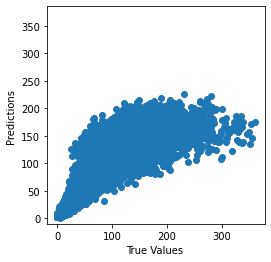

In [ ]:
g=plt.scatter(test_labels, preds)
# g.axes.set_yscale('log')
# g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

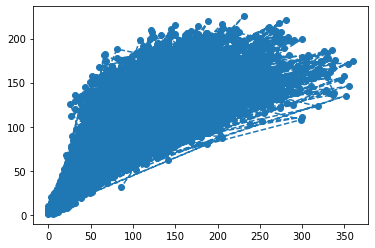

In [ ]:
g=plt.plot(test_labels, preds,marker='o',linestyle='--')

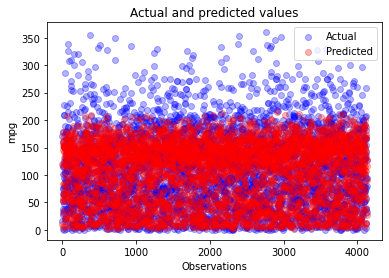

In [ ]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, test_labels.size), y=test_labels, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, preds.size), y=preds, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

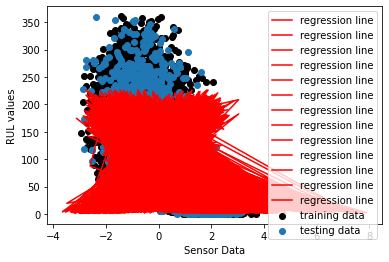

In [ ]:
plt.scatter(train_data[:,0], train_labels, c='k', label='training data')
plt.scatter(test_data[:,0], test_labels, label='testing data') 
# pred = reg.predict(X_test)
plt.plot(test_data, preds, c='r' , label='regression line')
plt.xlabel("Sensor Data"); plt.ylabel("RUL values")
plt.legend()
plt.show()

with K_Fold

In [ ]:
# Create logistic regression object
model = XGBRegressor()

# Create k-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)
# Conduct k-fold cross-validation
cv_results = cross_val_score(model, # Pipeline
                              X, # Feature matrix
                              y, # Target vector
                              cv=kf, # Cross-validation technique
                              scoring="neg_mean_absolute_error", # Loss function
                              n_jobs=-1) # Use all CPU scores
# Calculate mean
result = cv_results.mean()
result = result * (-1)
# result = sqrt(result)
result

29.65524220773502

In [60]:
# Create logistic regression object
model = RandomForestRegressor()

# Create k-Fold cross-validation
kf = KFold(n_splits=11, shuffle=True, random_state=1)
# Conduct k-fold cross-validation
cv_results = cross_val_score(model, # Pipeline
                              X, # Feature matrix
                              y, # Target vector
                              cv=kf, # Cross-validation technique
                              scoring="neg_root_mean_squared_error", # Loss function
                              n_jobs=-1) # Use all CPU scores
# Calculate mean
result = cv_results.mean()
result = result * (-1)
# result = sqrt(result)
result

0.039198964054234

# **XGB_GA**

In [ ]:
import random

0
1
2
3
4
5
6
7
This is number 0 generation
Best F score in this iteration = 0.6125
[2]
This is number 1 generation
Best F score in this iteration = 0.6125
[2]
This is number 2 generation
Best F score in this iteration = 0.6213
[1]
This is number 3 generation
Best F score in this iteration = 0.6213
[2]
Best fitness is = 0.6243
Best parameters are:
learning_rate 0.17
n_estimators 45.0
max_depth 3
min_child_weight 4.73
gamma 6.07
subsample 0.54
colsample_bytree 0.25


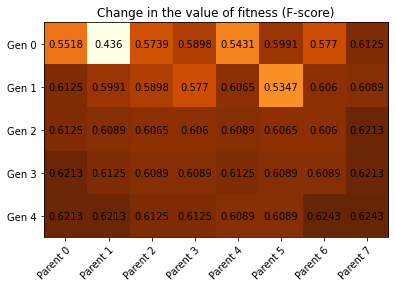

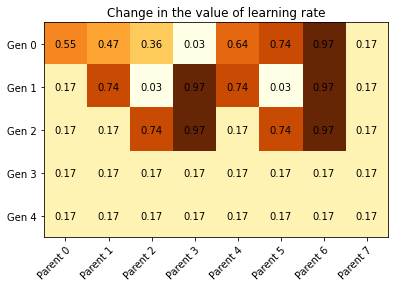

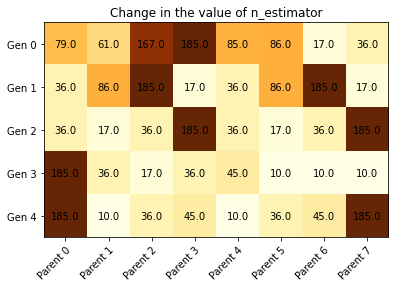

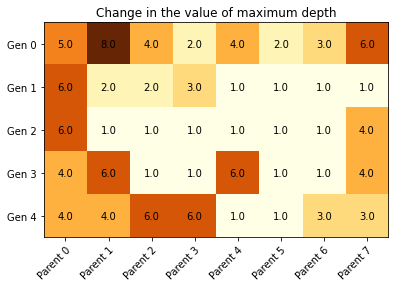

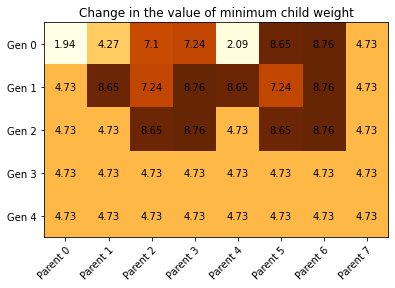

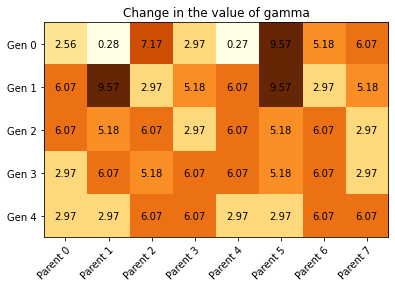

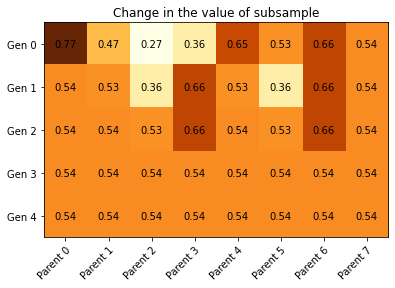

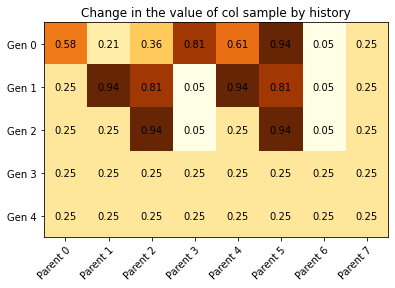

In [ ]:
class geneticXGboost:

  from sklearn.metrics import f1_score, r2_score, mean_squared_error, mean_absolute_error
  import numpy as np
  import random
  import xgboost as xgb
  import matplotlib.pyplot as plt


  random.seed(723)
  np.random.seed(723)

  def initilialize_poplulation(numberOfParents):
      learningRate = np.empty([numberOfParents, 1])
      nEstimators = np.empty([numberOfParents, 1], dtype = np.uint8)
      maxDepth = np.empty([numberOfParents, 1], dtype = np.uint8)
      minChildWeight = np.empty([numberOfParents, 1])
      gammaValue = np.empty([numberOfParents, 1])
      subSample = np.empty([numberOfParents, 1])
      colSampleByTree =  np.empty([numberOfParents, 1])

      for i in range(numberOfParents):
          print(i)
          learningRate[i] = round(random.uniform(0.01, 1), 2)
          nEstimators[i] = random.randrange(10, 1500, step = 25)
          maxDepth[i] = int(random.randrange(1, 10, step= 1))
          minChildWeight[i] = round(random.uniform(0.01, 10.0), 2)
          gammaValue[i] = round(random.uniform(0.01, 10.0), 2)
          subSample[i] = round(random.uniform(0.01, 1.0), 2)
          colSampleByTree[i] = round(random.uniform(0.01, 1.0), 2)
    
      population = np.concatenate((learningRate, nEstimators, maxDepth, minChildWeight, gammaValue, subSample, colSampleByTree), axis= 1)
      return population


  #create fitness function that will predict F1_score    

  def fitness_f1score(y_true, y_pred):
      fitness = round((r2_score(y_true, y_pred)), 4)
      return fitness

  #train the data annd find fitness score
  def train_population(population, dMatrixTrain, dMatrixtest, y_test):
      fScore = []
      for i in range(population.shape[0]):
          param = { 'objective':'reg:squarederror',
                'learning_rate': population[i][0],
                'n_estimators': population[i][1], 
                'max_depth': int(population[i][2]), 
                'min_child_weight': population[i][3],
                'gamma': population[i][4], 
                'subsample': population[i][5],
                'colsample_bytree': population[i][6],
                'seed': 24}
          num_round = 100
          xgbT = xgb.train(param, dMatrixTrain, num_round)
          preds = xgbT.predict(dMatrixtest)
          # preds = preds>0.5
          fScore.append(fitness_f1score(y_test, preds))
      return fScore



  #select parents for mating
  def new_parents_selection(population, fitness, numParents):
      selectedParents = np.empty((numParents, population.shape[1])) #create an array to store fittest parents
    
      #find the top best performing parents
      for parentId in range(numParents):
          bestFitnessId = np.where(fitness == np.max(fitness))
          bestFitnessId  = bestFitnessId[0][0]
          selectedParents[parentId, :] = population[bestFitnessId, :]
          fitness[bestFitnessId] = -1 #set this value to negative, in case of F1-score, so this parent is not selected again
      return selectedParents
        
  '''
  Mate these parents to create chilren having parameters from these parents (we are using uniform crossover method)
  '''
  def crossover_uniform(parents, childrenSize):
    
      crossoverPointIndex = np.arange(0, np.uint8(childrenSize[1]), 1, dtype= np.uint8) #get all the index
      crossoverPointIndex1 = np.random.randint(0, np.uint8(childrenSize[1]), np.uint8(childrenSize[1]/2)) # select half  of the indexes randomly
      crossoverPointIndex2 = np.array(list(set(crossoverPointIndex) - set(crossoverPointIndex1))) #select leftover indexes
    
      children = np.empty(childrenSize)
    

      '''
      Create child by choosing parameters from two paraents selected using new_parent_selection function. The parameter values
      will be picked from the indexes, which were randomly selected above. 
      '''
      for i in range(childrenSize[0]):
          #find parent 1 index 
          parent1_index = i%parents.shape[0]
          #find parent 2 index
          parent2_index = (i+1)%parents.shape[0]
          #insert parameters based on random selected indexes in parent 1
          children[i, crossoverPointIndex1] = parents[parent1_index, crossoverPointIndex1]
          #insert parameters based on random selected indexes in parent 1
          children[i, crossoverPointIndex2] = parents[parent2_index, crossoverPointIndex2]
      return children
    
  '''
  Introduce some mutation in the children. In case of XGboost we will introdcue mutation randomly on each parameter one at a time,
  based on which parameter is selected at random. Initially, we will define the maximum/minimum value that is allowed for the parameter, to prevent the
  out the range error during runtime. Subsequently, we will generate mutation value and add it to the parameter, and return the mutated offspring!!!
  '''

  def mutation(crossover, numberOfParameters):
      #Define minimum and maximum values allowed for each parameter

      minMaxValue = np.zeros((numberOfParameters, 2))
    
      minMaxValue[0:] = [0.01, 1.0] #min/max learning rate
      minMaxValue[1, :] = [10, 2000] #min/max n_estimator
      minMaxValue[2, :] = [1, 100] #min/max depth
      minMaxValue[3, :] = [0, 100.0] #min/max child_weight
      minMaxValue[4, :] = [0.01, 100.0] #min/max gamma
      minMaxValue[5, :] = [0.01, 1.0] #min/maxsubsample
      minMaxValue[6, :] = [0.01, 1.0] #min/maxcolsample_bytree
 
      # Mutation changes a single gene in each offspring randomly.
      mutationValue = 0
      parameterSelect = np.random.randint(0, 7, 1)
      print(parameterSelect)
      if parameterSelect == 0: #learning_rate
          mutationValue = round(np.random.uniform(-0.5, 0.5), 2)
      if parameterSelect == 1: #n_estimators
          mutationValue = np.random.randint(-200, 200, 1)
      if parameterSelect == 2: #max_depth
          mutationValue = np.random.randint(-5, 5, 1)
      if parameterSelect == 3: #min_child_weight
          mutationValue = round(np.random.uniform(5, 5), 2)
      if parameterSelect == 4: #gamma
          mutationValue = round(np.random.uniform(-2, 2), 2)
      if parameterSelect == 5: #subsample
          mutationValue = round(np.random.uniform(-0.5, 0.5), 2)
      if parameterSelect == 6: #colsample
          mutationValue = round(np.random.uniform(-0.5, 0.5), 2)
  
      #indtroduce mutation by changing one parameter, and set to max or min if it goes out of range
      for idx in range(crossover.shape[0]):
          crossover[idx, parameterSelect] = crossover[idx, parameterSelect] + mutationValue
          if(crossover[idx, parameterSelect] > minMaxValue[parameterSelect, 1]):
              crossover[idx, parameterSelect] = minMaxValue[parameterSelect, 1]
          if(crossover[idx, parameterSelect] < minMaxValue[parameterSelect, 0]):
              crossover[idx, parameterSelect] = minMaxValue[parameterSelect, 0]    
      return crossover


  '''
  This function will allow us to genrate the heatmap for various parameters and fitness to visualize 
  how each parameter and fitness changes with each generation
  '''

  def plot_parameters(numberOfGenerations, numberOfParents, parameter, parameterName):
      #inspired from https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html
      generationList = ["Gen {}".format(i) for i in range(numberOfGenerations+1)]
      populationList = ["Parent {}".format(i) for i in range(numberOfParents)]
    
      fig, ax = plt.subplots()
      im = ax.imshow(parameter, cmap=plt.get_cmap('YlOrBr'))
    
      # show ticks
      ax.set_xticks(np.arange(len(populationList)))
      ax.set_yticks(np.arange(len(generationList)))
    
      # show labels
      ax.set_xticklabels(populationList)
      ax.set_yticklabels(generationList)
    
      # set ticks at 45 degrees and rotate around anchor
      plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
              rotation_mode="anchor")
    
    
      # insert the value of the parameter in each cell
      for i in range(len(generationList)):
          for j in range(len(populationList)):
              text = ax.text(j, i, parameter[i, j],
                            ha="center", va="center", color="k")
    
      ax.set_title("Change in the value of " + parameterName)
      fig.tight_layout()
      plt.show()



###################################################################################################################################################################################


# '''
# We will use genetic algorithum to optimize hyperparameters for XGboost using the above class created . 
# '''

# Importing the libraries
import numpy as np
import pandas as pd
import xgboost as xgb


np.random.seed(723)


#XGboost Classifier

#model xgboost
#use xgboost API now
X_train = train_data
y_train = train_labels
X_test = test_data
y_test = test_labels

xgDMatrix = xgb.DMatrix(X_train, y_train) #create Dmatrix
xgbDMatrixTest = xgb.DMatrix(X_test, y_test)


# '''
# Let's find optimized parameters using genetic algorithms
# '''

numberOfParents = 8 #number of parents to start
numberOfParentsMating = 4 #number of parents that will mate
numberOfParameters = 7 #number of parameters that will be optimized
numberOfGenerations = 4 #number of genration that will be created

#define the population size

populationSize = (numberOfParents, numberOfParameters)

#initialize the population with randomly generated parameters
population = geneticXGboost.initilialize_poplulation(numberOfParents)

#define an array to store the fitness  hitory
fitnessHistory = np.empty([numberOfGenerations+1, numberOfParents])

#define an array to store the value of each parameter for each parent and generation
populationHistory = np.empty([(numberOfGenerations+1)*numberOfParents, numberOfParameters])

#insert the value of initial parameters to history
populationHistory[0:numberOfParents, :] = population

for generation in range(numberOfGenerations):
    print("This is number %s generation" % (generation))
    
    #train the dataset and obtain fitness
    fitnessValue = geneticXGboost.train_population(population=population, dMatrixTrain=xgDMatrix, dMatrixtest=xgbDMatrixTest, y_test=y_test)
    fitnessHistory[generation, :] = fitnessValue
    
    #best score in the current iteration
    print('Best F score in this iteration = {}'.format(np.max(fitnessHistory[generation, :])))

    #survival of the fittest - take the top parents, based on the fitness value and number of parents needed to be selected
    parents = geneticXGboost.new_parents_selection(population=population, fitness=fitnessValue, numParents=numberOfParentsMating)
    
    #mate these parents to create children having parameters from these parents (we are using uniform crossover)
    children = geneticXGboost.crossover_uniform(parents=parents, childrenSize=(populationSize[0] - parents.shape[0], numberOfParameters))
    
    #add mutation to create genetic diversity
    children_mutated = geneticXGboost.mutation(children, numberOfParameters)
    
    # '''
    # We will create new population, which will contain parents that where selected previously based on the
    # fitness score and rest of them  will be children
    # '''
    population[0:parents.shape[0], :] = parents #fittest parents
    population[parents.shape[0]:, :] = children_mutated #children
    
    populationHistory[(generation+1)*numberOfParents : (generation+1)*numberOfParents+ numberOfParents , :] = population #srore parent information
    

#Best solution from the final iteration

fitness = geneticXGboost.train_population(population=population, dMatrixTrain=xgDMatrix, dMatrixtest=xgbDMatrixTest, y_test=y_test)
fitnessHistory[generation+1, :] = fitness

#index of the best solution
bestFitnessIndex = np.where(fitness == np.max(fitness))[0][0]

#Best fitness
print("Best fitness is =", fitness[bestFitnessIndex])

#Best parameters
print("Best parameters are:")
print('learning_rate', population[bestFitnessIndex][0])
print('n_estimators', population[bestFitnessIndex][1])
print('max_depth', int(population[bestFitnessIndex][2])) 
print('min_child_weight', population[bestFitnessIndex][3])
print('gamma', population[bestFitnessIndex][4])
print('subsample', population[bestFitnessIndex][5])
print('colsample_bytree', population[bestFitnessIndex][6])


#visualize the change in fitness of the various generations and parents


geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, fitnessHistory, "fitness (F-score)")

#Look at individual parameters change with generation
#Create array for each parameter history (Genration x Parents)

learnigRateHistory = populationHistory[:, 0].reshape([numberOfGenerations+1, numberOfParents])
nEstimatorHistory = populationHistory[:, 1].reshape([numberOfGenerations+1, numberOfParents])
maxdepthHistory = populationHistory[:, 2].reshape([numberOfGenerations+1, numberOfParents])
minChildWeightHistory = populationHistory[:, 3].reshape([numberOfGenerations+1, numberOfParents])
gammaHistory = populationHistory[:, 4].reshape([numberOfGenerations+1, numberOfParents])
subsampleHistory = populationHistory[:, 5].reshape([numberOfGenerations+1, numberOfParents])
colsampleByTreeHistory = populationHistory[:, 6].reshape([numberOfGenerations+1, numberOfParents])

#generate heatmap for each parameter

geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, learnigRateHistory, "learning rate")
geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, nEstimatorHistory, "n_estimator")
geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, maxdepthHistory, "maximum depth")
geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, minChildWeightHistory, "minimum child weight")
geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, gammaHistory, "gamma")
geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, subsampleHistory, "subsample")
geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, colsampleByTreeHistory, "col sample by history")


In [ ]:
from xgboost import XGBRegressor as xgb

model = xgb(
    learning_rate =0.17,
    n_estimators= 45,
    max_depth= 3,
    gamma= 6.07,
    subsample= 0.54,
    colsample_bytree= 0.25
)

model.fit(train_data, train_labels)

preds = model.predict(test_data)


print("Model Root Mean Squared Error: ", sqrt(mean_squared_error(test_labels, preds)))
print("Model Mean Absolute Error: ", mean_absolute_error(test_labels, preds))
print("Model r-squared: ", r2_score(test_labels, preds))

[22:29:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Random Forest Root Mean Squared Error:  42.81784318767929
Random Forest Mean Absolute Error:  30.524391769467414
Random Forest r-squared:  0.6264483179789297


# **RF_GA**

0
1
2
3
4
5
6
7
This is number 0 generation
Best F score in this iteration = 0.5472
[0]
This is number 1 generation
Best F score in this iteration = 0.5557
[0]
This is number 2 generation
Best F score in this iteration = 0.5637
[2]
This is number 3 generation
Best F score in this iteration = 0.5759
[1]
Best fitness is = 0.5771
Best parameters are:
n_estimators 10
max_depth 9
max_lead_nodes 12


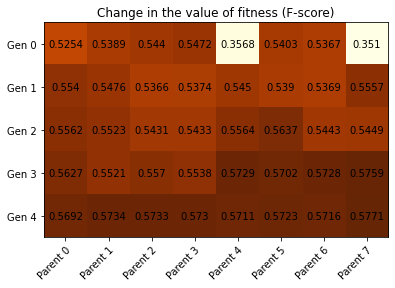

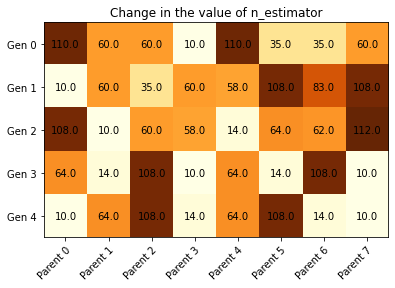

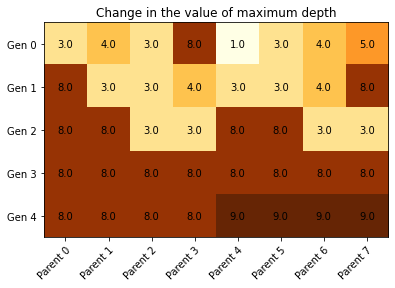

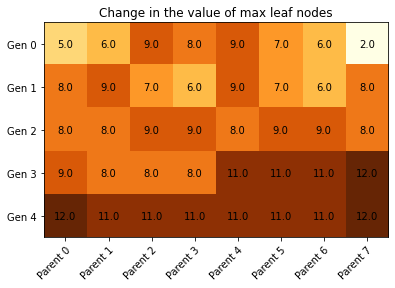

In [13]:
class geneticXGboost:

  from sklearn.metrics import f1_score, r2_score, mean_squared_error, mean_absolute_error
  import numpy as np
  import random
  import xgboost as xgb
  from sklearn.ensemble import RandomForestRegressor
  import matplotlib.pyplot as plt


  random.seed(723)
  np.random.seed(723)


  def initilialize_poplulation(numberOfParents):
      import random
      # learningRate = np.empty([numberOfParents, 1])

      nEstimators = np.empty([numberOfParents, 1], dtype = np.uint8)
      maxDepth = np.empty([numberOfParents, 1], dtype = np.uint8)
      maxleafnode = np.empty([numberOfParents, 1], dtype = np.uint8)

      # minChildWeight = np.empty([numberOfParents, 1])
      # gammaValue = np.empty([numberOfParents, 1])
      # subSample = np.empty([numberOfParents, 1])
      # colSampleByTree =  np.empty([numberOfParents, 1])

      for i in range(numberOfParents):
          print(i)
          # learningRate[i] = round(random.uniform(0.01, 1), 2)

          nEstimators[i] = random.randrange(10, 150, step = 25)
          maxDepth[i] = int(random.randrange(1, 10, step= 1))
          maxleafnode[i] = int(random.randrange(2, 10, step= 1))

          # minChildWeight[i] = round(random.uniform(0.01, 10.0), 2)
          # gammaValue[i] = round(random.uniform(0.01, 10.0), 2)
          # subSample[i] = round(random.uniform(0.01, 1.0), 2)
          # colSampleByTree[i] = round(random.uniform(0.01, 1.0), 2)
    
      # population = np.concatenate((learningRate, nEstimators, maxDepth, minChildWeight, gammaValue, subSample, colSampleByTree), axis= 1)
      population = np.concatenate((nEstimators, maxDepth, maxleafnode), axis= 1)
      return population


  #create fitness function that will predict F1_score    

  def fitness_f1score(y_true, y_pred):
      fitness = round((r2_score(y_true, y_pred)), 4)
      return fitness

  #train the data annd find fitness score
  def train_population(population, x_train, y_train, x_test, y_test):
      fScore = []
      for i in range(population.shape[0]):
          param = {
              #  'objective':'reg:squarederror',
              #   'learning_rate': population[i][0],
                'n_estimators': population[i][0], 
                'max_depth': int(population[i][1]), 
                'max_leaf_nodes': population[i][2],

                # 'gamma': population[i][4], 
                # 'subsample': population[i][5],
                # 'colsample_bytree': population[i][6],
                # 'seed': 24
                }
          num_round = 100
          model = RandomForestRegressor(**param)
          model =  model.fit(x_train, y_train)
          preds = model.predict(X_test)
          # preds = preds>0.5
          fScore.append(fitness_f1score(y_test, preds))
      return fScore



  #select parents for mating
  def new_parents_selection(population, fitness, numParents):
      selectedParents = np.empty((numParents, population.shape[1])) #create an array to store fittest parents
    
      #find the top best performing parents
      for parentId in range(numParents):
          bestFitnessId = np.where(fitness == np.max(fitness))
          bestFitnessId  = bestFitnessId[0][0]
          selectedParents[parentId, :] = population[bestFitnessId, :]
          fitness[bestFitnessId] = -1 #set this value to negative, in case of F1-score, so this parent is not selected again
      return selectedParents
        
  '''
  Mate these parents to create chilren having parameters from these parents (we are using uniform crossover method)
  '''
  def crossover_uniform(parents, childrenSize):
    
      crossoverPointIndex = np.arange(0, np.uint8(childrenSize[1]), 1, dtype= np.uint8) #get all the index
      crossoverPointIndex1 = np.random.randint(0, np.uint8(childrenSize[1]), np.uint8(childrenSize[1]/2)) # select half  of the indexes randomly
      crossoverPointIndex2 = np.array(list(set(crossoverPointIndex) - set(crossoverPointIndex1))) #select leftover indexes
    
      children = np.empty(childrenSize)
    

      '''
      Create child by choosing parameters from two paraents selected using new_parent_selection function. The parameter values
      will be picked from the indexes, which were randomly selected above. 
      '''
      for i in range(childrenSize[0]):
          #find parent 1 index 
          parent1_index = i%parents.shape[0]
          #find parent 2 index
          parent2_index = (i+1)%parents.shape[0]
          #insert parameters based on random selected indexes in parent 1
          children[i, crossoverPointIndex1] = parents[parent1_index, crossoverPointIndex1]
          #insert parameters based on random selected indexes in parent 1
          children[i, crossoverPointIndex2] = parents[parent2_index, crossoverPointIndex2]
      return children
    
  '''
  Introduce some mutation in the children. In case of XGboost we will introdcue mutation randomly on each parameter one at a time,
  based on which parameter is selected at random. Initially, we will define the maximum/minimum value that is allowed for the parameter, to prevent the
  out the range error during runtime. Subsequently, we will generate mutation value and add it to the parameter, and return the mutated offspring!!!
  '''

  def mutation(crossover, numberOfParameters):
      #Define minimum and maximum values allowed for each parameter

      minMaxValue = np.zeros((numberOfParameters, 2))
    
      # minMaxValue[0:] = [0.01, 1.0] #min/max learning rate
      minMaxValue[0, :] = [10, 2000] #min/max n_estimator
      minMaxValue[1, :] = [1, 100] #min/max depth
      minMaxValue[2, :] = [0, 100] #min/max child_weight

      # minMaxValue[4, :] = [0.01, 100.0] #min/max gamma
      # minMaxValue[5, :] = [0.01, 1.0] #min/maxsubsample
      # minMaxValue[6, :] = [0.01, 1.0] #min/maxcolsample_bytree
 
      # Mutation changes a single gene in each offspring randomly.
      mutationValue = 0
      parameterSelect = np.random.randint(0, 3, 1)
      print(parameterSelect)
      # if parameterSelect == 0: #learning_rate
      #     mutationValue = round(np.random.uniform(-0.5, 0.5), 2)

      if parameterSelect == 0: #n_estimators
          mutationValue = np.random.randint(-200, 200, 1)
      if parameterSelect == 1: #max_depth
          mutationValue = np.random.randint(-5, 5, 1)
      if parameterSelect == 2: #min_child_weight
          mutationValue = np.random.randint(-5, 5, 1)

      # if parameterSelect == 4: #gamma
      #     mutationValue = round(np.random.uniform(-2, 2), 2)
      # if parameterSelect == 5: #subsample
      #     mutationValue = round(np.random.uniform(-0.5, 0.5), 2)
      # if parameterSelect == 6: #colsample
      #     mutationValue = round(np.random.uniform(-0.5, 0.5), 2)
  
      #indtroduce mutation by changing one parameter, and set to max or min if it goes out of range
      for idx in range(crossover.shape[0]):
          crossover[idx, parameterSelect] = crossover[idx, parameterSelect] + mutationValue
          if(crossover[idx, parameterSelect] > minMaxValue[parameterSelect, 1]):
              crossover[idx, parameterSelect] = minMaxValue[parameterSelect, 1]
          if(crossover[idx, parameterSelect] < minMaxValue[parameterSelect, 0]):
              crossover[idx, parameterSelect] = minMaxValue[parameterSelect, 0]    
      return crossover


  '''
  This function will allow us to genrate the heatmap for various parameters and fitness to visualize 
  how each parameter and fitness changes with each generation
  '''

  def plot_parameters(numberOfGenerations, numberOfParents, parameter, parameterName):
      #inspired from https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html
      generationList = ["Gen {}".format(i) for i in range(numberOfGenerations+1)]
      populationList = ["Parent {}".format(i) for i in range(numberOfParents)]
    
      fig, ax = plt.subplots()
      im = ax.imshow(parameter, cmap=plt.get_cmap('YlOrBr'))
    
      # show ticks
      ax.set_xticks(np.arange(len(populationList)))
      ax.set_yticks(np.arange(len(generationList)))
    
      # show labels
      ax.set_xticklabels(populationList)
      ax.set_yticklabels(generationList)
    
      # set ticks at 45 degrees and rotate around anchor
      plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
              rotation_mode="anchor")
    
    
      # insert the value of the parameter in each cell
      for i in range(len(generationList)):
          for j in range(len(populationList)):
              text = ax.text(j, i, parameter[i, j],
                            ha="center", va="center", color="k")
    
      ax.set_title("Change in the value of " + parameterName)
      fig.tight_layout()
      plt.show()



###################################################################################################################################################################################


# '''
# We will use genetic algorithum to optimize hyperparameters for XGboost using the above class created . 
# '''

# Importing the libraries
import numpy as np
import pandas as pd
import xgboost as xgb


np.random.seed(723)


#XGboost Classifier

#model xgboost
#use xgboost API now
X_train = train_data
y_train = train_labels
X_test = test_data
y_test = test_labels

# xgDMatrix = xgb.DMatrix(X_train, y_train) #create Dmatrix
# xgbDMatrixTest = xgb.DMatrix(X_test, y_test)


# '''
# Let's find optimized parameters using genetic algorithms
# '''

numberOfParents = 8 #number of parents to start
numberOfParentsMating = 4 #number of parents that will mate
numberOfParameters = 3 #number of parameters that will be optimized
numberOfGenerations = 4 #number of genration that will be created

#define the population size

populationSize = (numberOfParents, numberOfParameters)

#initialize the population with randomly generated parameters
population = geneticXGboost.initilialize_poplulation(numberOfParents)

#define an array to store the fitness  hitory
fitnessHistory = np.empty([numberOfGenerations+1, numberOfParents])

#define an array to store the value of each parameter for each parent and generation
populationHistory = np.empty([(numberOfGenerations+1)*numberOfParents, numberOfParameters])

#insert the value of initial parameters to history
populationHistory[0:numberOfParents, :] = population

for generation in range(numberOfGenerations):
    print("This is number %s generation" % (generation))
    
    #train the dataset and obtain fitness
    fitnessValue = geneticXGboost.train_population(population, X_train, y_train, X_test, y_test)
    fitnessHistory[generation, :] = fitnessValue
    
    #best score in the current iteration
    print('Best F score in this iteration = {}'.format(np.max(fitnessHistory[generation, :])))

    #survival of the fittest - take the top parents, based on the fitness value and number of parents needed to be selected
    parents = geneticXGboost.new_parents_selection(population=population, fitness=fitnessValue, numParents=numberOfParentsMating)
    
    #mate these parents to create children having parameters from these parents (we are using uniform crossover)
    children = geneticXGboost.crossover_uniform(parents=parents, childrenSize=(populationSize[0] - parents.shape[0], numberOfParameters))
    
    #add mutation to create genetic diversity
    children_mutated = geneticXGboost.mutation(children, numberOfParameters)
    
    # '''
    # We will create new population, which will contain parents that where selected previously based on the
    # fitness score and rest of them  will be children
    # '''
    population[0:parents.shape[0], :] = parents #fittest parents
    population[parents.shape[0]:, :] = children_mutated #children
    
    populationHistory[(generation+1)*numberOfParents : (generation+1)*numberOfParents+ numberOfParents , :] = population #srore parent information
    

#Best solution from the final iteration

fitness = geneticXGboost.train_population(population, X_train, y_train, X_test, y_test)
fitnessHistory[generation+1, :] = fitness

#index of the best solution
bestFitnessIndex = np.where(fitness == np.max(fitness))[0][0]

#Best fitness
print("Best fitness is =", fitness[bestFitnessIndex])

#Best parameters
print("Best parameters are:")
# print('learning_rate', population[bestFitnessIndex][0])

print('n_estimators', population[bestFitnessIndex][0])
print('max_depth', int(population[bestFitnessIndex][1])) 
print('max_lead_nodes', population[bestFitnessIndex][2])

# print('gamma', population[bestFitnessIndex][4])
# print('subsample', population[bestFitnessIndex][5])
# print('colsample_bytree', population[bestFitnessIndex][6])


#visualize the change in fitness of the various generations and parents


geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, fitnessHistory, "fitness (F-score)")

#Look at individual parameters change with generation
#Create array for each parameter history (Genration x Parents)

# learnigRateHistory = populationHistory[:, 0].reshape([numberOfGenerations+1, numberOfParents])

nEstimatorHistory = populationHistory[:, 0].reshape([numberOfGenerations+1, numberOfParents])
maxdepthHistory = populationHistory[:, 1].reshape([numberOfGenerations+1, numberOfParents])
maxleafnodeHistory = populationHistory[:, 2].reshape([numberOfGenerations+1, numberOfParents])

# gammaHistory = populationHistory[:, 4].reshape([numberOfGenerations+1, numberOfParents])
# subsampleHistory = populationHistory[:, 5].reshape([numberOfGenerations+1, numberOfParents])
# colsampleByTreeHistory = populationHistory[:, 6].reshape([numberOfGenerations+1, numberOfParents])

#generate heatmap for each parameter

# geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, learnigRateHistory, "learning rate")

geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, nEstimatorHistory, "n_estimator")
geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, maxdepthHistory, "maximum depth")
geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, maxleafnodeHistory, "max leaf nodes")

# geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, gammaHistory, "gamma")
# geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, subsampleHistory, "subsample")
# geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, colsampleByTreeHistory, "col sample by history")


In [14]:
model = RandomForestRegressor(
n_estimators =10,
max_depth =9,
max_leaf_nodes =12
)

model.fit(train_data, train_labels)

preds = model.predict(test_data)


print("Model Root Mean Squared Error: ", sqrt(mean_squared_error(test_labels, preds)))
print("Model Mean Absolute Error: ", mean_absolute_error(test_labels, preds))
print("Model r-squared: ", r2_score(test_labels, preds))

Random Forest Root Mean Squared Error:  45.72564122603883
Random Forest Mean Absolute Error:  33.42524348681655
Random Forest r-squared:  0.5739890809995521


# **SVC_GA**

0
1
2
3
4
5
6
7
This is number 0 generation
Best F score in this iteration = 0.6221
[0]
This is number 1 generation
Best F score in this iteration = 0.6221
[0]
This is number 2 generation
Best F score in this iteration = 0.6227
[2]
This is number 3 generation
Best F score in this iteration = 0.6227
[0]
Best fitness is = 0.6227
Best parameters are:
C 20.0
degree 3
epsilon 8.0


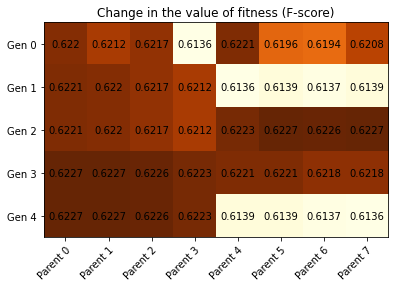

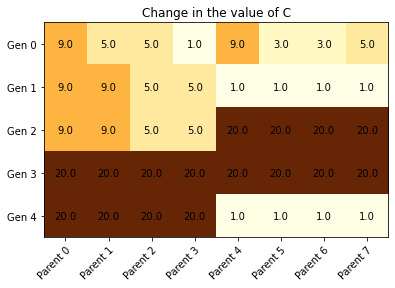

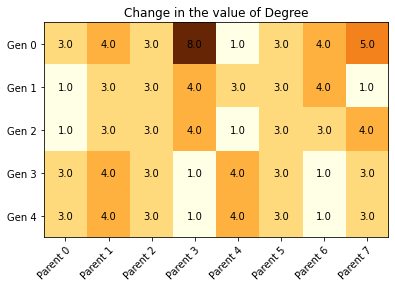

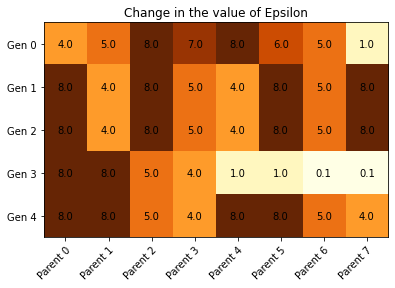

In [88]:
class geneticXGboost:

  from sklearn.metrics import f1_score, r2_score, mean_squared_error, mean_absolute_error
  import numpy as np
  import random
  import xgboost as xgb
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.svm import SVR
  import matplotlib.pyplot as plt


  random.seed(723)
  np.random.seed(723)

  def initilialize_poplulation(numberOfParents):
      import random
      # learningRate = np.empty([numberOfParents, 1])

      C = np.empty([numberOfParents, 1], dtype = np.uint8)
      degree = np.empty([numberOfParents, 1], dtype = np.uint8)
      epsilon = np.empty([numberOfParents, 1])

      # minChildWeight = np.empty([numberOfParents, 1])
      # gammaValue = np.empty([numberOfParents, 1])
      # subSample = np.empty([numberOfParents, 1])
      # colSampleByTree =  np.empty([numberOfParents, 1])

      for i in range(numberOfParents):
          print(i)
          # learningRate[i] = round(random.uniform(0.01, 1), 2)

          C[i] = random.randrange(1, 10, step = 2)
          degree[i] = int(random.randrange(1, 10, step= 1))
          epsilon[i] = int(random.randrange(1, 10, step= 1))

          # minChildWeight[i] = round(random.uniform(0.01, 10.0), 2)
          # gammaValue[i] = round(random.uniform(0.01, 10.0), 2)
          # subSample[i] = round(random.uniform(0.01, 1.0), 2)
          # colSampleByTree[i] = round(random.uniform(0.01, 1.0), 2)
    
      # population = np.concatenate((learningRate, nEstimators, maxDepth, minChildWeight, gammaValue, subSample, colSampleByTree), axis= 1)
      population = np.concatenate((C, degree, epsilon), axis= 1)
      return population


  #create fitness function that will predict F1_score    

  def fitness_f1score(y_true, y_pred):
      fitness = round((r2_score(y_true, y_pred)), 4)
      return fitness

  #train the data annd find fitness score
  def train_population(population, x_train, y_train, x_test, y_test):
      fScore = []
      for i in range(population.shape[0]):
          param = {
              #  'objective':'reg:squarederror',
              #   'learning_rate': population[i][0],
                'C': population[i][0], 
                'degree': int(population[i][1]), 
                'epsilon': population[i][2],

                # 'gamma': population[i][4], 
                # 'subsample': population[i][5],
                # 'colsample_bytree': population[i][6],
                # 'seed': 24
                }
          num_round = 100
          model = SVR(**param)
          model =  model.fit(x_train, y_train)
          preds = model.predict(X_test)
          # preds = preds>0.5
          fScore.append(fitness_f1score(y_test, preds))
      return fScore



  #select parents for mating
  def new_parents_selection(population, fitness, numParents):
      selectedParents = np.empty((numParents, population.shape[1])) #create an array to store fittest parents
    
      #find the top best performing parents
      for parentId in range(numParents):
          bestFitnessId = np.where(fitness == np.max(fitness))
          bestFitnessId  = bestFitnessId[0][0]
          selectedParents[parentId, :] = population[bestFitnessId, :]
          fitness[bestFitnessId] = -1 #set this value to negative, in case of F1-score, so this parent is not selected again
      return selectedParents
        
  '''
  Mate these parents to create chilren having parameters from these parents (we are using uniform crossover method)
  '''
  def crossover_uniform(parents, childrenSize):
    
      crossoverPointIndex = np.arange(0, np.uint8(childrenSize[1]), 1, dtype= np.uint8) #get all the index
      crossoverPointIndex1 = np.random.randint(0, np.uint8(childrenSize[1]), np.uint8(childrenSize[1]/2)) # select half  of the indexes randomly
      crossoverPointIndex2 = np.array(list(set(crossoverPointIndex) - set(crossoverPointIndex1))) #select leftover indexes
    
      children = np.empty(childrenSize)
    

      '''
      Create child by choosing parameters from two paraents selected using new_parent_selection function. The parameter values
      will be picked from the indexes, which were randomly selected above. 
      '''
      for i in range(childrenSize[0]):
          #find parent 1 index 
          parent1_index = i%parents.shape[0]
          #find parent 2 index
          parent2_index = (i+1)%parents.shape[0]
          #insert parameters based on random selected indexes in parent 1
          children[i, crossoverPointIndex1] = parents[parent1_index, crossoverPointIndex1]
          #insert parameters based on random selected indexes in parent 1
          children[i, crossoverPointIndex2] = parents[parent2_index, crossoverPointIndex2]
      return children
    
  '''
  Introduce some mutation in the children. In case of XGboost we will introdcue mutation randomly on each parameter one at a time,
  based on which parameter is selected at random. Initially, we will define the maximum/minimum value that is allowed for the parameter, to prevent the
  out the range error during runtime. Subsequently, we will generate mutation value and add it to the parameter, and return the mutated offspring!!!
  '''

  def mutation(crossover, numberOfParameters):
      #Define minimum and maximum values allowed for each parameter

      minMaxValue = np.zeros((numberOfParameters, 2))
    
      # minMaxValue[0:] = [0.01, 1.0] #min/max learning rate
      minMaxValue[0, :] = [1, 20] #min/max n_estimator
      minMaxValue[1, :] = [1, 10] #min/max depth
      minMaxValue[2, :] = [0.1, 1.0] #min/max child_weight

      # minMaxValue[4, :] = [0.01, 100.0] #min/max gamma
      # minMaxValue[5, :] = [0.01, 1.0] #min/maxsubsample
      # minMaxValue[6, :] = [0.01, 1.0] #min/maxcolsample_bytree
 
      # Mutation changes a single gene in each offspring randomly.
      mutationValue = 0
      parameterSelect = np.random.randint(0, 3, 1)
      print(parameterSelect)
      # if parameterSelect == 0: #learning_rate
      #     mutationValue = round(np.random.uniform(-0.5, 0.5), 2)

      if parameterSelect == 0: #n_estimators
          mutationValue = np.random.randint(-200, 200, 1)
      if parameterSelect == 1: #max_depth
          mutationValue = np.random.randint(-5, 5, 1)
      if parameterSelect == 2: #min_child_weight
          mutationValue = np.random.randint(-5, 5, 1)

      # if parameterSelect == 4: #gamma
      #     mutationValue = round(np.random.uniform(-2, 2), 2)
      # if parameterSelect == 5: #subsample
      #     mutationValue = round(np.random.uniform(-0.5, 0.5), 2)
      # if parameterSelect == 6: #colsample
      #     mutationValue = round(np.random.uniform(-0.5, 0.5), 2)
  
      #indtroduce mutation by changing one parameter, and set to max or min if it goes out of range
      for idx in range(crossover.shape[0]):
          crossover[idx, parameterSelect] = crossover[idx, parameterSelect] + mutationValue
          if(crossover[idx, parameterSelect] > minMaxValue[parameterSelect, 1]):
              crossover[idx, parameterSelect] = minMaxValue[parameterSelect, 1]
          if(crossover[idx, parameterSelect] < minMaxValue[parameterSelect, 0]):
              crossover[idx, parameterSelect] = minMaxValue[parameterSelect, 0]    
      return crossover


  '''
  This function will allow us to genrate the heatmap for various parameters and fitness to visualize 
  how each parameter and fitness changes with each generation
  '''

  def plot_parameters(numberOfGenerations, numberOfParents, parameter, parameterName):
      #inspired from https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html
      generationList = ["Gen {}".format(i) for i in range(numberOfGenerations+1)]
      populationList = ["Parent {}".format(i) for i in range(numberOfParents)]
    
      fig, ax = plt.subplots()
      im = ax.imshow(parameter, cmap=plt.get_cmap('YlOrBr'))
    
      # show ticks
      ax.set_xticks(np.arange(len(populationList)))
      ax.set_yticks(np.arange(len(generationList)))
    
      # show labels
      ax.set_xticklabels(populationList)
      ax.set_yticklabels(generationList)
    
      # set ticks at 45 degrees and rotate around anchor
      plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
              rotation_mode="anchor")
    
    
      # insert the value of the parameter in each cell
      for i in range(len(generationList)):
          for j in range(len(populationList)):
              text = ax.text(j, i, parameter[i, j],
                            ha="center", va="center", color="k")
    
      ax.set_title("Change in the value of " + parameterName)
      fig.tight_layout()
      plt.show()



###################################################################################################################################################################################


# '''
# We will use genetic algorithum to optimize hyperparameters for XGboost using the above class created . 
# '''

# Importing the libraries
import numpy as np
import pandas as pd
import xgboost as xgb


np.random.seed(723)


#XGboost Classifier

#model xgboost
#use xgboost API now
X_train = train_data
y_train = train_labels
X_test = test_data
y_test = test_labels

# xgDMatrix = xgb.DMatrix(X_train, y_train) #create Dmatrix
# xgbDMatrixTest = xgb.DMatrix(X_test, y_test)


# '''
# Let's find optimized parameters using genetic algorithms
# '''

numberOfParents = 8 #number of parents to start
numberOfParentsMating = 4 #number of parents that will mate
numberOfParameters = 3 #number of parameters that will be optimized
numberOfGenerations = 4 #number of genration that will be created

#define the population size

populationSize = (numberOfParents, numberOfParameters)

#initialize the population with randomly generated parameters
population = geneticXGboost.initilialize_poplulation(numberOfParents)

#define an array to store the fitness  hitory
fitnessHistory = np.empty([numberOfGenerations+1, numberOfParents])

#define an array to store the value of each parameter for each parent and generation
populationHistory = np.empty([(numberOfGenerations+1)*numberOfParents, numberOfParameters])

#insert the value of initial parameters to history
populationHistory[0:numberOfParents, :] = population

for generation in range(numberOfGenerations):
    print("This is number %s generation" % (generation))
    
    #train the dataset and obtain fitness
    fitnessValue = geneticXGboost.train_population(population, X_train, y_train, X_test, y_test)
    fitnessHistory[generation, :] = fitnessValue
    
    #best score in the current iteration
    print('Best F score in this iteration = {}'.format(np.max(fitnessHistory[generation, :])))

    #survival of the fittest - take the top parents, based on the fitness value and number of parents needed to be selected
    parents = geneticXGboost.new_parents_selection(population=population, fitness=fitnessValue, numParents=numberOfParentsMating)
    
    #mate these parents to create children having parameters from these parents (we are using uniform crossover)
    children = geneticXGboost.crossover_uniform(parents=parents, childrenSize=(populationSize[0] - parents.shape[0], numberOfParameters))
    
    #add mutation to create genetic diversity
    children_mutated = geneticXGboost.mutation(children, numberOfParameters)
    
    # '''
    # We will create new population, which will contain parents that where selected previously based on the
    # fitness score and rest of them  will be children
    # '''
    population[0:parents.shape[0], :] = parents #fittest parents
    population[parents.shape[0]:, :] = children_mutated #children
    
    populationHistory[(generation+1)*numberOfParents : (generation+1)*numberOfParents+ numberOfParents , :] = population #srore parent information
    

#Best solution from the final iteration

fitness = geneticXGboost.train_population(population, X_train, y_train, X_test, y_test)
fitnessHistory[generation+1, :] = fitness

#index of the best solution
bestFitnessIndex = np.where(fitness == np.max(fitness))[0][0]

#Best fitness
print("Best fitness is =", fitness[bestFitnessIndex])

#Best parameters
print("Best parameters are:")
# print('learning_rate', population[bestFitnessIndex][0])

print('C', population[bestFitnessIndex][0])
print('degree', int(population[bestFitnessIndex][1])) 
print('epsilon', population[bestFitnessIndex][2])

# print('gamma', population[bestFitnessIndex][4])
# print('subsample', population[bestFitnessIndex][5])
# print('colsample_bytree', population[bestFitnessIndex][6])


#visualize the change in fitness of the various generations and parents


geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, fitnessHistory, "fitness (F-score)")

#Look at individual parameters change with generation
#Create array for each parameter history (Genration x Parents)

# learnigRateHistory = populationHistory[:, 0].reshape([numberOfGenerations+1, numberOfParents])

nEstimatorHistory = populationHistory[:, 0].reshape([numberOfGenerations+1, numberOfParents])
maxdepthHistory = populationHistory[:, 1].reshape([numberOfGenerations+1, numberOfParents])
maxleafnodeHistory = populationHistory[:, 2].reshape([numberOfGenerations+1, numberOfParents])

# gammaHistory = populationHistory[:, 4].reshape([numberOfGenerations+1, numberOfParents])
# subsampleHistory = populationHistory[:, 5].reshape([numberOfGenerations+1, numberOfParents])
# colsampleByTreeHistory = populationHistory[:, 6].reshape([numberOfGenerations+1, numberOfParents])

#generate heatmap for each parameter

# geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, learnigRateHistory, "learning rate")

geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, nEstimatorHistory, "C")
geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, maxdepthHistory, "Degree")
geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, maxleafnodeHistory, "Epsilon")

# geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, gammaHistory, "gamma")
# geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, subsampleHistory, "subsample")
# geneticXGboost.plot_parameters(numberOfGenerations, numberOfParents, colsampleByTreeHistory, "col sample by history")


In [91]:
model = SVR(
C =20.0,
degree =3,
epsilon= 8.0
)

model.fit(train_data, train_labels)

preds = model.predict(test_data)


print("Model Root Mean Squared Error: ", sqrt(mean_squared_error(test_labels, preds)))
print("Model Mean Absolute Error: ", mean_absolute_error(test_labels, preds))
print("Model r-squared: ", r2_score(test_labels, preds))

Random Forest Root Mean Squared Error:  43.03380692230096
Random Forest Mean Absolute Error:  29.646873296060157
Random Forest r-squared:  0.6226705907397763
